Blob Detection using Laplacian of Gaussian (LoG) and Difference of Gaussian (DoG)

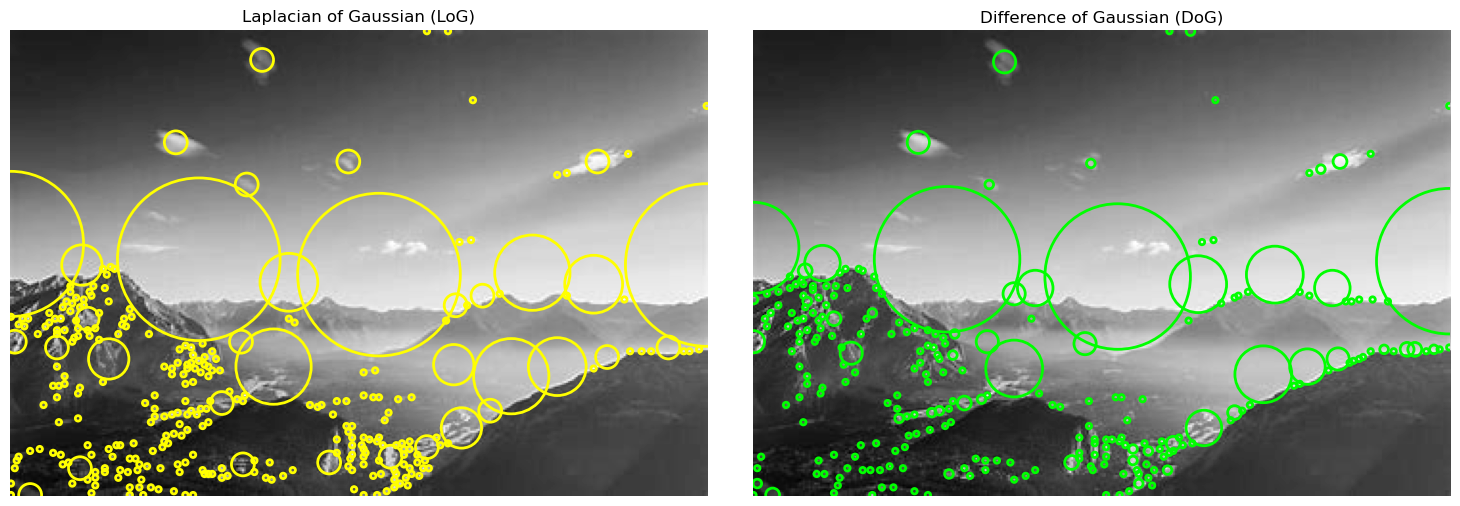

In [5]:
from math import sqrt
import cv2
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread("mon.jpg",cv2.IMREAD_GRAYSCALE)


# Perform blob detection using LoG, DoG, and DoH
blobs_log = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.05)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)  # Adjust radius for LoG

blobs_dog = blob_dog(image, max_sigma=30, threshold=0.05)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)  # Adjust radius for DoG



# Prepare visualization
blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'lime']
titles = ['Laplacian of Gaussian (LoG)', 'Difference of Gaussian (DoG)']

# Create subplots for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(zip(blobs_list, colors, titles)):
    ax[idx].set_title(title)
    ax[idx].imshow(image,cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()


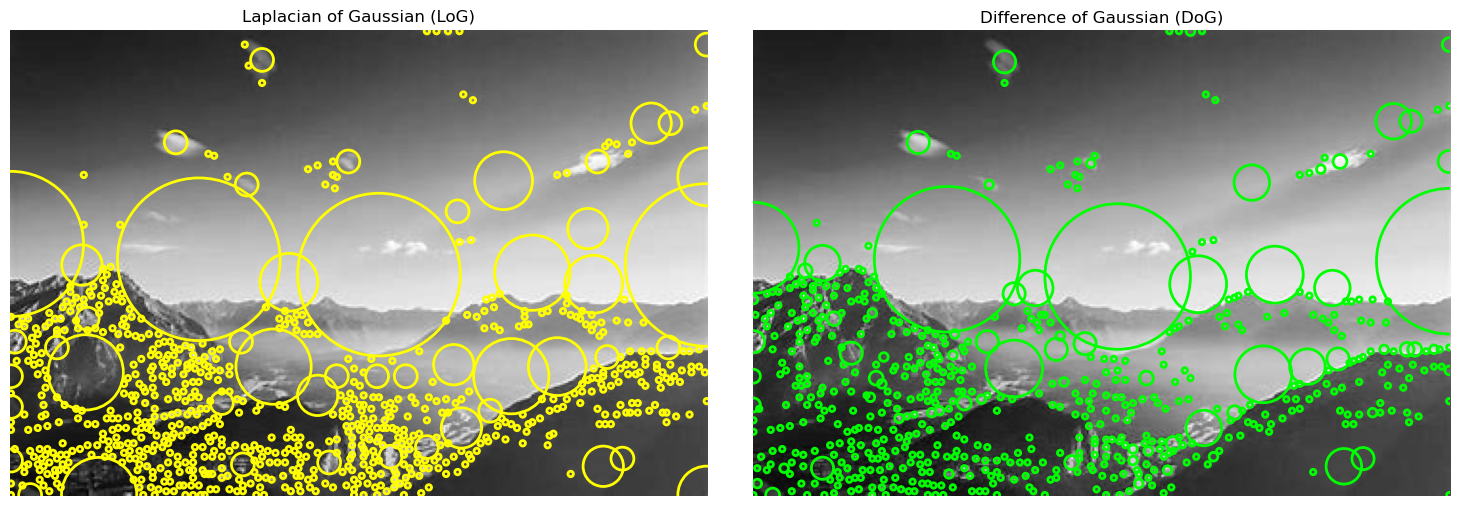

In [7]:
from math import sqrt
import cv2
from skimage.feature import blob_dog, blob_log
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread("mon.jpg",cv2.IMREAD_GRAYSCALE)


# Perform blob detection using LoG, DoG, and DoH
blobs_log = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.01)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)  # Adjust radius for LoG

blobs_dog = blob_dog(image, max_sigma=30, threshold=0.01)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)  # Adjust radius for DoG



# Prepare visualization
blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'lime']
titles = ['Laplacian of Gaussian (LoG)', 'Difference of Gaussian (DoG)']

# Create subplots for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(zip(blobs_list, colors, titles)):
    ax[idx].set_title(title)
    ax[idx].imshow(image,cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()


Blob Detection using OpenCV's SimpleBlobDetector

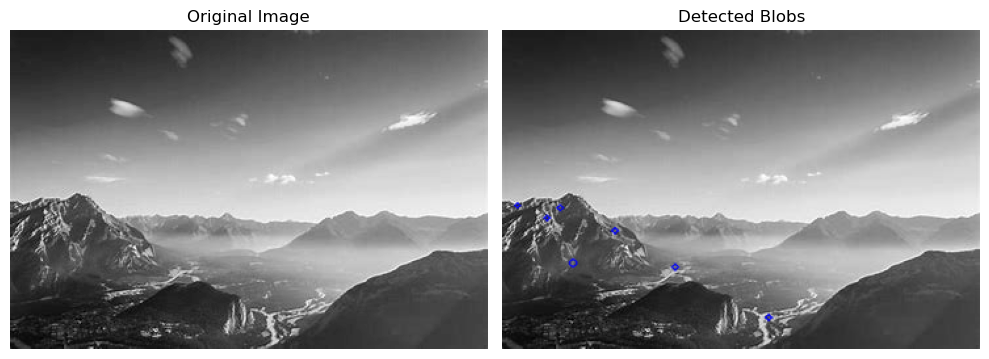

Number of blobs detected: 7
Blob 1: X=11.34, Y=133.21, Diameter=3.72
Blob 2: X=53.64, Y=176.98, Diameter=5.37
Blob 3: X=43.90, Y=134.93, Diameter=4.47
Blob 4: X=202.65, Y=218.46, Diameter=4.47
Blob 5: X=85.57, Y=152.40, Diameter=4.60
Blob 6: X=33.88, Y=142.62, Diameter=3.97
Blob 7: X=131.43, Y=180.07, Diameter=4.72


In [8]:
params = cv2.SimpleBlobDetector_Params()

# Filter by area
params.filterByArea = True
params.minArea = 10 # Adjust to set minimum blob size
params.maxArea = 2000  # Adjust to set maximum blob size

# Filter by circularity
params.filterByCircularity = True
params.minCircularity = 0.5  # Adjust based on circularity of blobs (0 to 1)

# Filter by convexity
params.filterByConvexity = True
params.minConvexity = 0.7  # Adjust to filter convex blobs

# Filter by inertia (elongated shapes)
params.filterByInertia = True
params.minInertiaRatio = 0.3

# Create a blob detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
 # Convert to BGR for colored output
output_image = cv2.drawKeypoints(image, keypoints, None, (0, 0, 255),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the original and output images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

# Image with Detected Blobs
plt.subplot(1, 2, 2)
plt.title("Detected Blobs")
plt.imshow(output_image)
plt.axis("off")

plt.tight_layout()
plt.show()

# Print blob information
print(f"Number of blobs detected: {len(keypoints)}")
for i, keypoint in enumerate(keypoints, 1):
    print(f"Blob {i}: X={keypoint.pt[0]:.2f}, Y={keypoint.pt[1]:.2f}, Diameter={keypoint.size:.2f}")

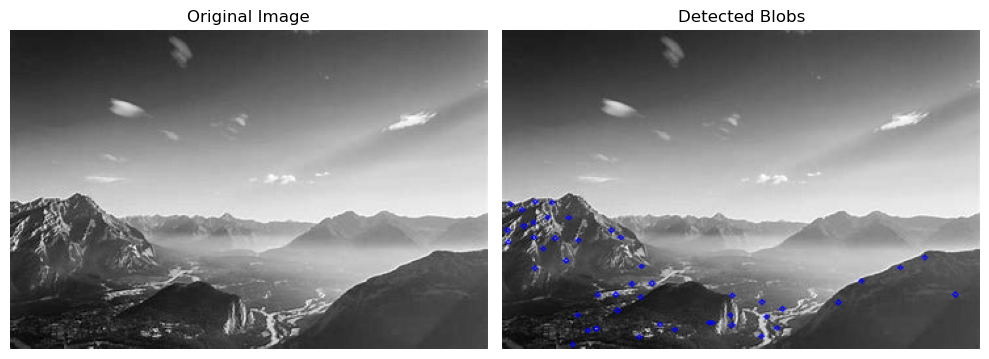

Number of blobs detected: 47
Blob 1: X=53.50, Y=239.00, Diameter=2.96
Blob 2: X=64.95, Y=228.37, Diameter=3.16
Blob 3: X=57.18, Y=216.71, Diameter=2.96
Blob 4: X=104.21, Y=233.23, Diameter=3.16
Blob 5: X=71.57, Y=226.99, Diameter=4.05
Blob 6: X=87.65, Y=213.15, Diameter=3.61
Blob 7: X=72.59, Y=201.22, Diameter=3.11
Blob 8: X=105.23, Y=203.00, Diameter=3.16
Blob 9: X=86.23, Y=200.90, Diameter=3.65
Blob 10: X=131.13, Y=227.75, Diameter=2.96
Blob 11: X=119.98, Y=223.80, Diameter=2.83
Blob 12: X=3.81, Y=151.85, Diameter=3.50
Blob 13: X=157.41, Y=222.51, Diameter=2.96
Blob 14: X=159.72, Y=222.45, Diameter=2.96
Blob 15: X=175.03, Y=201.75, Diameter=2.96
Blob 16: X=4.39, Y=160.99, Diameter=2.96
Blob 17: X=16.37, Y=148.73, Diameter=3.59
Blob 18: X=23.85, Y=157.42, Diameter=3.11
Blob 19: X=23.65, Y=146.08, Diameter=2.96
Blob 20: X=34.43, Y=142.16, Diameter=2.96
Blob 21: X=14.89, Y=136.49, Diameter=3.30
Blob 22: X=24.76, Y=130.31, Diameter=2.96
Blob 23: X=197.07, Y=232.73, Diameter=3.16
Blob 24:

In [12]:


# Set up SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by area (size of blobs)
params.filterByArea = True
params.minArea = 5   # Adjust minimum size of blobs
params.maxArea = 5000   # Adjust maximum size of blobs

# Filter by thresholding (brightness)
params.minThreshold = 5   # Lower threshold for detection
params.maxThreshold = 100  # Upper threshold for detection

# Create a SimpleBlobDetector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs
output_image = cv2.drawKeypoints(image, keypoints, None, (0, 0, 255),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Detected Blobs")
plt.imshow(output_image)
plt.axis("off")

plt.tight_layout()
plt.show()

# Print blob details
print(f"Number of blobs detected: {len(keypoints)}")
for i, keypoint in enumerate(keypoints, 1):
    print(f"Blob {i}: X={keypoint.pt[0]:.2f}, Y={keypoint.pt[1]:.2f}, Diameter={keypoint.size:.2f}")


Blob Detection on Color Images

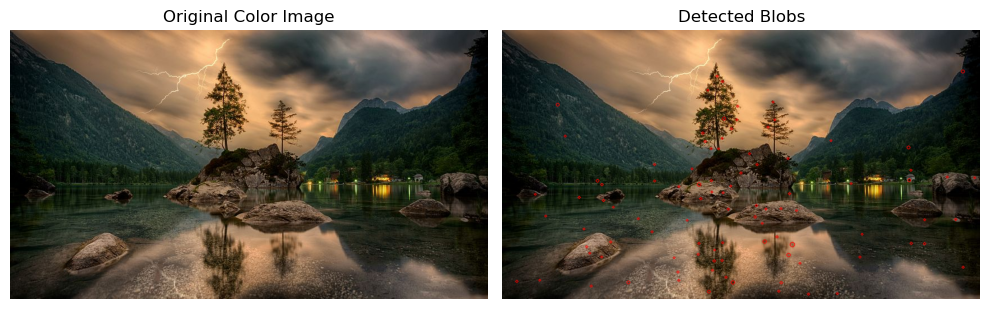

Number of blobs detected: 95
Blob 1: X=822.35, Y=422.85, Diameter=4.30
Blob 2: X=753.83, Y=338.14, Diameter=3.85
Blob 3: X=137.37, Y=298.18, Diameter=4.55
Blob 4: X=180.63, Y=303.61, Diameter=4.43
Blob 5: X=58.95, Y=292.63, Diameter=3.58
Blob 6: X=170.07, Y=268.65, Diameter=5.05
Blob 7: X=729.21, Y=249.70, Diameter=3.85
Blob 8: X=454.73, Y=239.54, Diameter=4.12
Blob 9: X=510.06, Y=228.82, Diameter=4.01
Blob 10: X=441.36, Y=220.27, Diameter=4.00
Blob 11: X=724.98, Y=209.14, Diameter=5.35
Blob 12: X=822.09, Y=73.55, Diameter=5.67
Blob 13: X=26.04, Y=448.09, Diameter=4.55
Blob 14: X=638.22, Y=404.66, Diameter=4.01
Blob 15: X=378.87, Y=392.12, Diameter=3.58
Blob 16: X=753.54, Y=380.82, Diameter=4.57
Blob 17: X=729.96, Y=380.10, Diameter=4.61
Blob 18: X=642.17, Y=363.95, Diameter=3.80
Blob 19: X=198.23, Y=315.59, Diameter=3.65
Blob 20: X=453.52, Y=312.68, Diameter=4.30
Blob 21: X=512.67, Y=291.59, Diameter=4.25
Blob 22: X=177.87, Y=275.23, Diameter=4.64
Blob 23: X=425.97, Y=254.64, Diameter

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image_color = cv2.imread("forest.jpg")  # Replace with your image path

# Ensure the image is loaded properly
if image_color is None:
    raise ValueError("Image not found. Check the file path.")

# Convert the image to grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Set up SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by area (size of blobs)
params.filterByArea = True
params.minArea = 10     # Adjust minimum size of blobs
params.maxArea = 1000    # Adjust maximum size of blobs

# Filter by thresholding (brightness)
params.minThreshold = 10   # Lower threshold for detection
params.maxThreshold = 200  # Upper threshold for detection

# Create a SimpleBlobDetector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs on the grayscale image
keypoints = detector.detect(image_gray)

# Draw detected blobs on the original color image
image_with_blobs = cv2.drawKeypoints(image_color, keypoints, None, (0, 0, 255),
                                     cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR to RGB for proper Matplotlib display
image_with_blobs_rgb = cv2.cvtColor(image_with_blobs, cv2.COLOR_BGR2RGB)

# Display the original and processed images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Color Image")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Image with Detected Blobs
plt.subplot(1, 2, 2)
plt.title("Detected Blobs")
plt.imshow(image_with_blobs_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

# Print blob details
print(f"Number of blobs detected: {len(keypoints)}")
for i, keypoint in enumerate(keypoints, 1):
    print(f"Blob {i}: X={keypoint.pt[0]:.2f}, Y={keypoint.pt[1]:.2f}, Diameter={keypoint.size:.2f}")


Harris Corner Detection

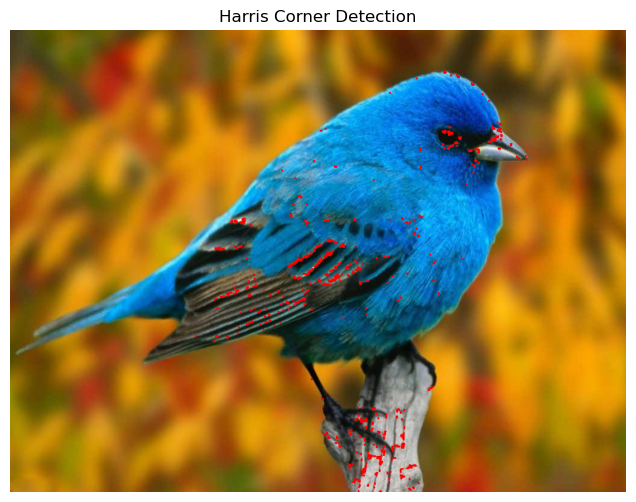

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("bird.jpg")  # Replace with your image path
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detector
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the detected corners for better visualization
dst = cv2.dilate(dst, None)

# Apply thresholding to highlight strong corners
threshold = 0.01 * dst.max()  # Adjust this value to experiment with corner strength
image[dst > threshold] = [0, 0, 255]  # Mark corners in red

# Convert BGR to RGB for proper Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()


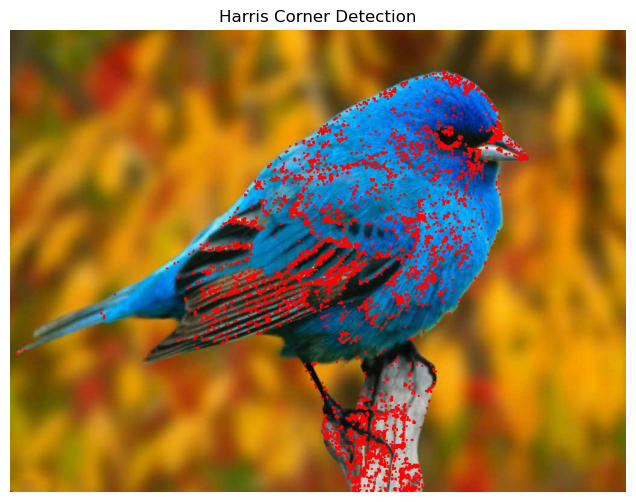

In [19]:
threshold = 0.001 * dst.max()  # Adjust this value to experiment with corner strength
image[dst > threshold] = [0, 0, 255]  # Mark corners in red

# Convert BGR to RGB for proper Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()


 Shi-Tomasi Corner Detection

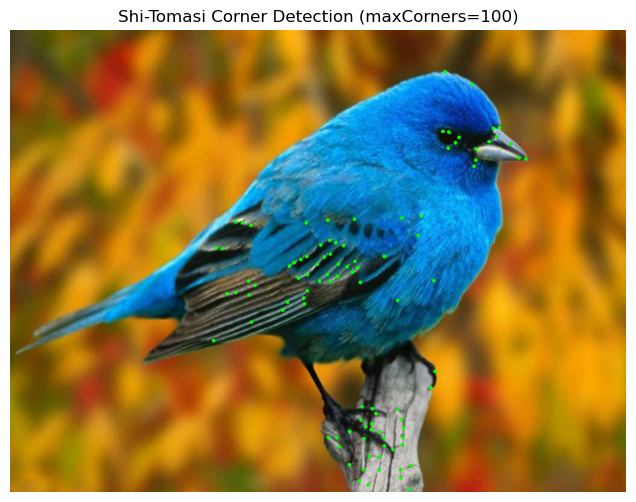

In [20]:
# Load the image
image = cv2.imread("bird.jpg")  # Replace with your image path
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect Shi-Tomasi corners
maxCorners = 100  # Modify this value to analyze the impact
corners = cv2.goodFeaturesToTrack(gray, maxCorners=maxCorners, qualityLevel=0.01, minDistance=10)

# Convert corners to integer values
corners = np.int0(corners)

# Draw corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 3, (0, 255, 0), -1)  # Green circles for corners

# Convert BGR to RGB for proper Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title(f"Shi-Tomasi Corner Detection (maxCorners={maxCorners})")
plt.axis("off")
plt.show()


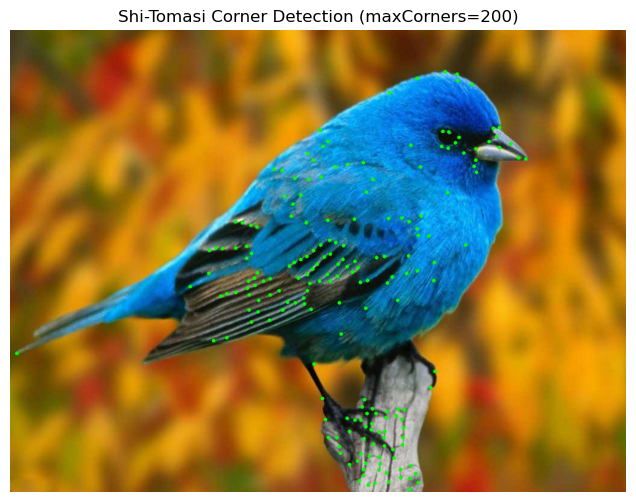

In [22]:
maxCorners = 200  # Modify this value to analyze the impact
corners = cv2.goodFeaturesToTrack(gray, maxCorners=maxCorners, qualityLevel=0.01, minDistance=10)

# Convert corners to integer values
corners = np.int0(corners)

# Draw corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 3, (0, 255, 0), -1)  # Green circles for corners

# Convert BGR to RGB for proper Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title(f"Shi-Tomasi Corner Detection (maxCorners={maxCorners})")
plt.axis("off")
plt.show()
